### Curva típica T(°C) x R(&#937;) do termistor NTC
Considerando &#946; = 3935 para um NTC 10k&#937;.\
Aresistência de um NTC é dada por  \
\
$R(T) = R(T_0)e^{\beta(\frac{1}{T} - \frac{1}{T_0})}$\
\
O valor de &#946; é determinado por \
\
$\beta = \frac{ln|\frac{R(T)}{R(T_0)}|}{\frac{1}{T} - \frac{1}{T_0}}$\
\
E a temperatura é obtida usando \
\
$T = \frac{\beta T_0}{ln|\frac{R(T)}{R(T_0)}|T_0 + \beta}$\
\
Desta forma, é possível obter a curva típica:

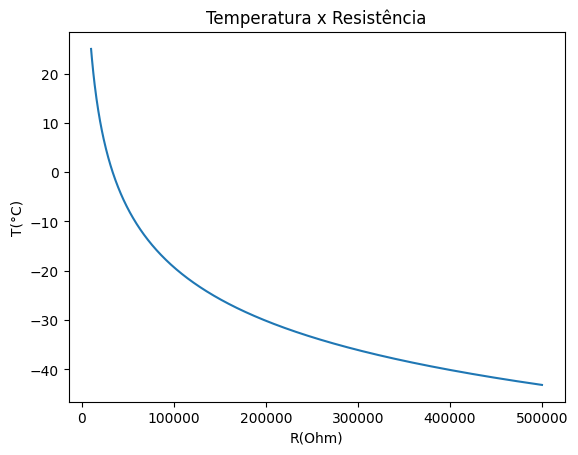

In [11]:
import matplotlib.pyplot as plt
import numpy as np

BETA_COEFF = 3935
T_0 = 298.15
R_0 = 10000

def T(x):
    return (BETA_COEFF*T_0)/(np.log(x/R_0)*T_0 + BETA_COEFF)

R = np.linspace(500000, 10000, 1000)

temp = []

for value in R:
    temp.append(T(value) - 273.15)

plt.title("Temperatura x Resistência")
plt.xlabel("R(Ohm)")
plt.ylabel("T(°C)")
plt.plot(R, temp)
plt.show()


### Medidas do ADC (ESP32 - DevKit)

In [20]:
import pandas as pd

data = pd.read_csv('ADCread.csv', usecols=['R', 'Esperado', 'GPIO 2', 'GPIO 35'])
df = pd.DataFrame(data=data)

df

,R,Esperado,GPIO 2,GPIO 35
0,0,0.0,0.128,0.142
1,340,0.1,0.145,0.162
2,640,0.2,0.225,0.220
3,1000,0.3,0.315,0.317
4,1400,0.4,0.400,0.424
5,1800,0.5,0.480,0.521
6,2240,0.6,0.560,0.623
7,2720,0.7,0.630,0.730
8,3240,0.8,0.700,0.822
9,3750,0.9,0.760,0.915


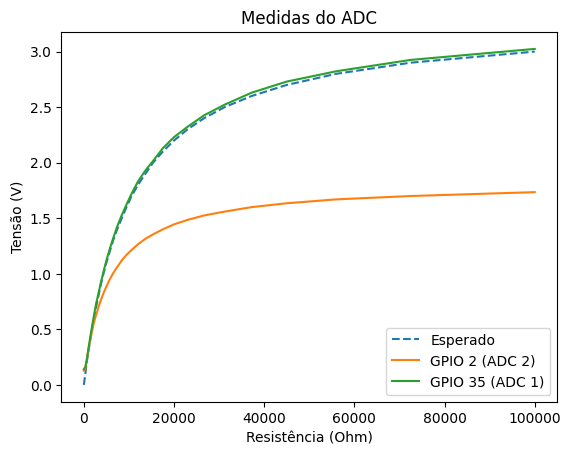

In [39]:
subtitles = ["Esperado", "GPIO 2 (ADC 2)", "GPIO 35 (ADC 1)"]

plt.title("Medidas do ADC")
plt.ylabel("Tensão (V)")
plt.xlabel("Resistência (Ohm)")
plt.plot(df['R'], df['Esperado'], "--")
plt.plot(df['R'], df['GPIO 2'])
plt.plot(df['R'], df['GPIO 35'])
plt.legend(subtitles, loc = "lower right")
plt.show()

O ADC 2 não é recomedado para realizar as medidas, pois possui restrições de uso em conjunto com o WiFi.